In [1]:
import numpy as np
import pandas as pd
import scvelo as scv
import scanpy as sc
import anndata as ad

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed.h5ad')

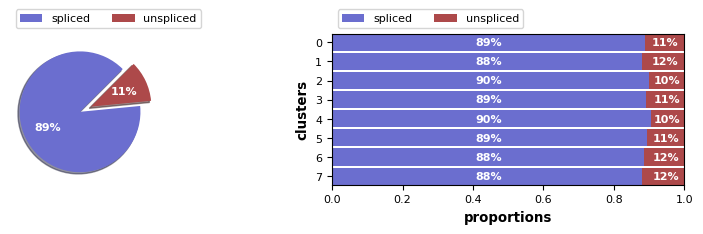

In [3]:
scv.pl.proportions(adata)

In [4]:
scv.pp.filter_and_normalize(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [5]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
adata

computing neighbors
    finished (0:00:09) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'gene_count_corr'
    uns: 'leiden', 'neighbors', 'umap', 'pca'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'allele_c57', 'allele_cast', 'ambiguous', 'matrix', 'ratio_allele_c57', 'ratio_allele_cast', 'spanning', 'spliced', 'total', 'unspliced', 'unspliced_by_total', 'Ms', 'Mu'
    obsp: 'connectivities', 'distances'

In [6]:
adata

AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'gene_count_corr'
    uns: 'leiden', 'neighbors', 'umap', 'pca'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'allele_c57', 'allele_cast', 'ambiguous', 'matrix', 'ratio_allele_c57', 'ratio_allele_cast', 'spanning', 'spliced', 'total', 'unspliced', 'unspliced_by_total', 'Ms', 'Mu'
    obsp: 'connectivities', 'distances'

In [7]:
scv.tl.recover_dynamics(adata, n_jobs = 6)
adata

recovering dynamics (using 6/8 cores)


  0%|          | 0/3433 [00:00<?, ?gene/s]

    finished (0:06:35) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling'
    uns: 'leiden', 'neighbors', 'umap', 'pca', 'recover_dynamics'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'allele_c57', 'allele_cast', 'ambiguous', 'matrix', 'ratio_allele_c57', 'r

In [8]:
scv.tl.velocity(adata,  mode='dynamical')
adata

computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden', 'neighbors', 'umap', 'pca', 'recover_dynamics', 'velocity_params'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'allele_c57', 'allele_cast', 'ambiguo

In [9]:
scv.tl.velocity_graph(adata, n_jobs = 8)
adata

computing velocity graph (using 8/8 cores)


  0%|          | 0/682 [00:00<?, ?cells/s]

    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden', 'neighbors', 'umap', 'pca', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_umap', 'X_pca'
    v

In [10]:
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata.obs['clusters'] = adata.obs['leiden'].copy()

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


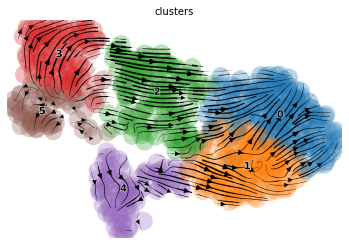

AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden', 'neighbors', 'umap', 'pca', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'clusters_colors'
    obsm: 'X_u

In [11]:
scv.pl.velocity_embedding_stream(adata, basis='umap')
adata

In [12]:
adata.write('../data/processed/mus_musculus_dynam.h5ad')

In [13]:
adata = ad.read('../data/processed/mus_musculus_dynam.h5ad')

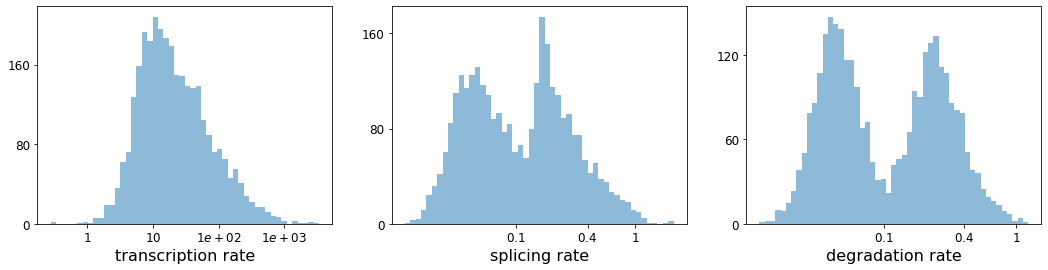

,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
Gene,,,,,,,,,,,,,,,,
Mrpl15,0.123596,30.208899,2.764623,0.054307,33.843252,0.022529,3.151711,66.100418,0.227344,0.0,0.0,0.499407,9.049048,357.012104,1.103913,7.224912
Tram1,0.055172,8.983851,0.176854,0.022111,107.602295,0.119603,8.404254,33.201641,0.222864,0.0,0.0,0.498047,43.111554,283.821166,1.165792,21.274333
Tceb1,0.518219,168.887038,4.223255,0.084875,90.503526,0.011554,7.817303,319.701630,0.361280,0.0,0.0,0.499817,28.406724,1829.915437,0.438968,9.222557
1110058L19Rik,0.081923,24.819202,10.925337,0.049190,21.766485,0.013811,0.907664,31.053917,0.220459,0.0,0.0,0.498833,2.236716,272.148379,1.122294,3.131527
Prim2,0.749397,195.648076,0.894838,0.455999,9.438493,0.252710,52.704308,98.542923,0.635358,0.0,0.0,0.499915,126.420804,322.524681,0.131158,1.989965


In [14]:
# kinetic rate params
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)
    
test_df = scv.get_df(adata, 'fit*', dropna=True)

scv.get_df(adata, 'fit*', dropna=True).head()

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


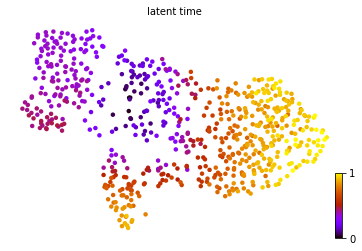

In [15]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

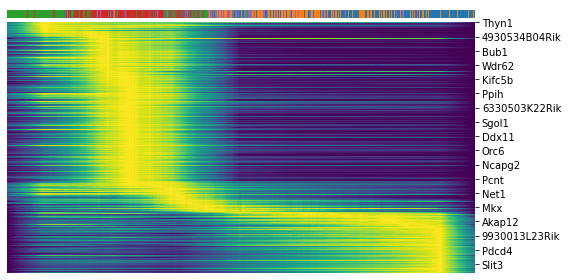

In [16]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

In [17]:
adata.write('../data/processed/mus_musculus_preprocessed_scvelo_params.h5ad')

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
Gene,,,,,,,,,,,,,,,,,,,,,
